In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


Text(0.5, 0, 'frog')

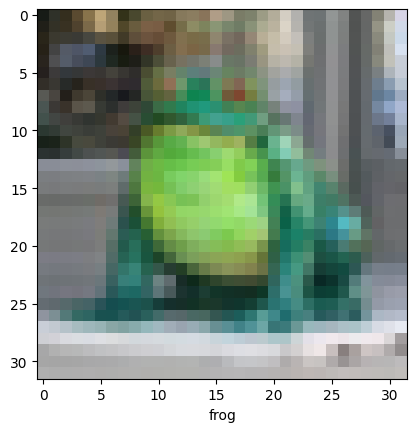

In [5]:
index = 19
plt.imshow(X_train[index])
plt.xlabel(classes[y_train[index][0]])

In [6]:
X_train = X_train / 255
X_test = X_test / 255

In [12]:
cnn = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='leaky_relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='leaky_relu'),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='leaky_relu'),
    keras.layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 68s 43ms/step - loss: 1.3699 - accuracy: 0.5145
Epoch 2/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.0228 - accuracy: 0.6440
Epoch 3/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8885 - accuracy: 0.6919
Epoch 4/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.7886 - accuracy: 0.7281
Epoch 5/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.7095 - accuracy: 0.7526
Epoch 6/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.6375 - accuracy: 0.7779
Epoch 7/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.5779 - accuracy: 0.7964
Epoch 8/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.5204 - accuracy: 0.8196
Epoch 9/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.4727 - accuracy: 0.8329
Epoch 10/10
1563/1563 [==============================] - 69s 44m

313/313 [==============================] - 5s 15ms/step


Text(95.72222222222221, 0.5, 'Truth')

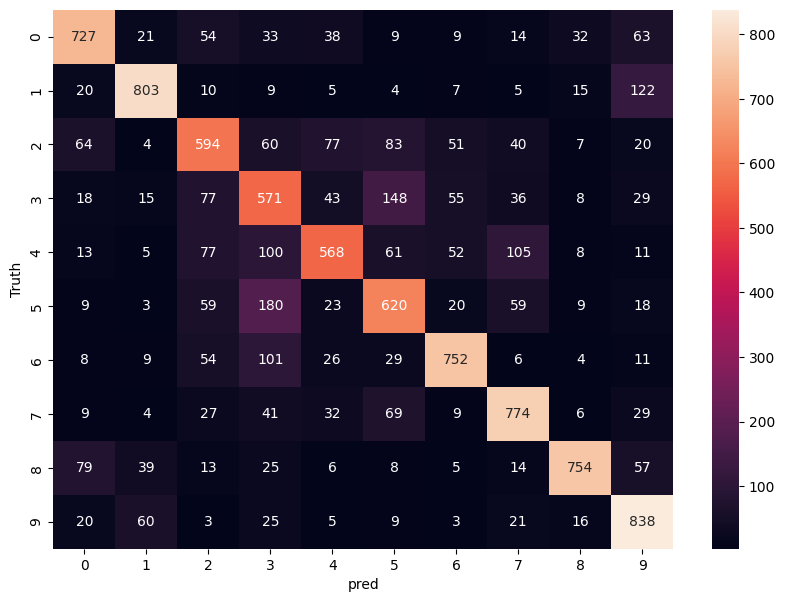

In [13]:
cnn.evaluate(X_test,y_test)
y_pred = cnn.predict(X_test)
y_pred_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('pred')
plt.ylabel('Truth')

In [14]:
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix

mse = mean_squared_error(y_test, y_pred_labels)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, y_pred_labels)
print("Mean Absolute Error:", mae)

r2 = r2_score(y_test, y_pred_labels)
print("R-squared:", r2)

a = accuracy_score(y_test, y_pred_labels)
print("Accuracy Score:", a)

cm= confusion_matrix(y_test, y_pred_labels)
print("Confusion Matrix : ")
print(cm)

print("Full report : ")
print(classification_report(y_test, y_pred_labels))

Mean Squared Error: 5.1096
Mean Absolute Error: 1.02
R-squared: 0.38065454545454547
Accuracy Score: 0.7001
Confusion Matrix : 
[[727  21  54  33  38   9   9  14  32  63]
 [ 20 803  10   9   5   4   7   5  15 122]
 [ 64   4 594  60  77  83  51  40   7  20]
 [ 18  15  77 571  43 148  55  36   8  29]
 [ 13   5  77 100 568  61  52 105   8  11]
 [  9   3  59 180  23 620  20  59   9  18]
 [  8   9  54 101  26  29 752   6   4  11]
 [  9   4  27  41  32  69   9 774   6  29]
 [ 79  39  13  25   6   8   5  14 754  57]
 [ 20  60   3  25   5   9   3  21  16 838]]
Full report : 
              precision    recall  f1-score   support

           0       0.75      0.73      0.74      1000
           1       0.83      0.80      0.82      1000
           2       0.61      0.59      0.60      1000
           3       0.50      0.57      0.53      1000
           4       0.69      0.57      0.62      1000
           5       0.60      0.62      0.61      1000
           6       0.78      0.75      0.77     